# Práctica 1: Aprendizaje automático

__Fecha de entrega: XXX de YYY de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: 5__

__Nombres de los estudiantes: Pablo Martinez y Jorge Villacorta__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [26]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('calidad_vinos.csv')

In [56]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Dado que los valores están medidos en diferentes unidades de medida y toman escalas muy diferentes, no es razonable pensar que la variable menos concentrada sobre la media es la que toma valores más altos (lo mismo para saber cual es menos concentrada). Para ello nos fijamos en los valores más separados que obtenemos dividiendo el máximo y el mínimo con respecto a la media calculada.

**total sulfur dioxide**

In [8]:
(df['total sulfur dioxide'].min()/df['total sulfur dioxide'].mean(),df['total sulfur dioxide'].max()/df['total sulfur dioxide'].mean())

(0.12912169255201744, 6.21936152458884)

In [10]:
df['total sulfur dioxide'].max()/df['total sulfur dioxide'].mean() - df['total sulfur dioxide'].min()/df['total sulfur dioxide'].mean()

6.090239832036823

**chlorides**

In [9]:
(df['chlorides'].min()/df['chlorides'].mean(),df['chlorides'].max()/df['chlorides'].mean())

(0.13719531814184324, 6.985528282055518)

In [11]:
df['chlorides'].max()/df['chlorides'].mean() - df['chlorides'].min()/df['chlorides'].mean()

6.848332963913675

Para saber que valores están menos concentrados, hemos restado el máximo frente al mínimo con respecto a la media, para saber la diferencia entre ambos. De esta manera, de las dos posibles opciones que habiamos supuesto, obtenemos que la variable 'chlorides' es la que toma un mayor rango de valores, y por tanto, la que esta menos concentrada con respecto a la media. A demás, observando la desviación de la variable que es mayor que la mitad de la media, podemos confirmar la hipótesis anterior.

A continuación realizamos el mismo procedimiento para saber que variable está más concentrada con respecto su media:



**density**

In [16]:
(df['density'].min()/df['density'].mean(),df['density'].max()/df['density'].mean())

(0.9933015285488457, 1.0069659834043965)

In [17]:
df['density'].max()/df['density'].mean() - df['density'].min()/df['density'].mean()

0.01366445485555079

**pH**

In [18]:
(df['pH'].min()/df['pH'].mean(),df['pH'].max()/df['pH'].mean())

(0.8275162575290821, 1.2110730630261382)

In [19]:
df['pH'].max()/df['pH'].mean() - df['pH'].min()/df['pH'].mean()

0.38355680549705606

Como podemos observar, la variable density es la que más concentrada está con respecto a la media según los datos calculados. Un dato que lo corrobora es la desviación típica de esta variable, que no supone ni el 1% de la media calculada. 

**¿Cómo pueden afectar estas variables en el perceptrón multicapa?**

En la variable muy concentrada encontraremos unos resultados de error mínimos (dado que el rango de valores que se dará en el entrenamiento será muy pequeño y acotado), mientras que con la variable menos concentrada, los datos de error que obtendra el perceptrón serán muy altos al haber tanta disparidad de posibles valores de las variables.

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad y, selecciona las variables que estén más correlacionadas con ella (estableciendo para ello un valor umbral que consideres adecuado).

Vamos a ver el valor de correlación entre las variables que tenemos y la variable de salida 'calidad'

In [30]:
correl = df.corr()
correl['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Podemos observar entre las variables más correlaciondas: alcohol(0.476), volatile acid(-0.39), sulphates(0.251), citric acid(0.226) y total sulfur dioxide(-0.185).
Comprobamos cuales son lás mas correlacionadas aplicando un filtro de correlacion de más del 20% en valor absoluto (teniendo en cuenta que la variable más correlacionada arroja menos de un 50% de correlación)

<AxesSubplot:>

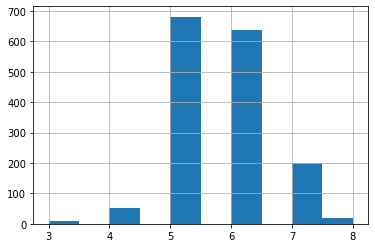

In [82]:
df['quality'].hist()

Observamos una distribución asimétrica a la izquierda y con un número de observaciones bastante alto en la penultima barra.

In [53]:
most_related = correl[abs(correl['quality']) > 0.2]['quality'] 
most_related

volatile acidity   -0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

Vamos a representar la variable 'quality' con las cuatro variables  con las que comparte más relación:

**volatile acidity**

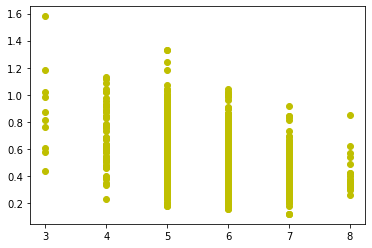

In [49]:
plt.plot(df['quality'],df['volatile acidity'], 'oy')

La variable con mayor correlación negativa, vemos que ha medida que aumenta la calidad del vino, disminuye la cantidad de acidez volátil. Es curioso observar que no se recopilan los menores datos de acidez en la clase con mayor calidad, de hay que no este tán correlacionada (dependera de la combinación de otros factores junto con la acidez, el que se alcance la mayor calidad).

**citric acid**

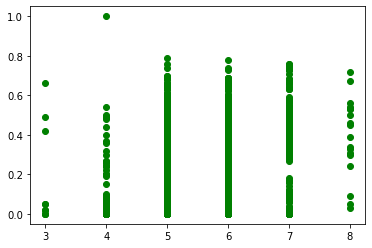

In [50]:
plt.plot(df['quality'],df['citric acid'], 'og')

**alcohol**

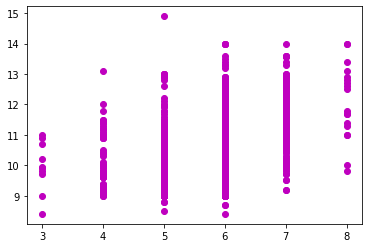

In [51]:
plt.plot(df['quality'],df['alcohol'], 'om')

La variable con mayor correlación positiva, vemos que al aumentar el alcohol incrementa la calidad del vino, aunque predominan los valores comprendidos entre 9 y 12 en la mayoria de tipos de calidad.

**sulphates**

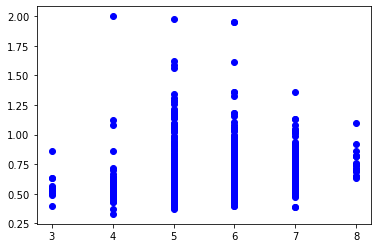

In [52]:
plt.plot(df['quality'],df['sulphates'], 'ob')

Como podemos observar, si existe cierta relación entre la variable objetivo y las variables con mayor correlación a esta, pero no muy alta (la mayor correlación obtenida está por debajo del 0.5)

A continuación creamos el dataframe con la variable objetivo y las cuatro variables más correlacionadas que hemos estudiado.

In [60]:
df_result = df.loc[:,['volatile acidity','citric acid','alcohol','sulphates','quality']]
df_result

,volatile acidity,citric acid,alcohol,sulphates,quality
0,0.700,0.00,9.4,0.56,5
1,0.880,0.00,9.8,0.68,5
2,0.760,0.04,9.8,0.65,5
3,0.280,0.56,9.8,0.58,6
4,0.700,0.00,9.4,0.56,5
...,...,...,...,...,...
1594,0.600,0.08,10.5,0.58,5
1595,0.550,0.10,11.2,0.76,6
1596,0.510,0.13,11.0,0.75,6
1597,0.645,0.12,10.2,0.71,5


### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


Cuando trabajamos con redes neuronales suele ser una buena idea reescalar los datos para facilitar que el entrenamiento converja más rápidamente.

Como hemos visto en el estudio de que variable está más concentrada con respecto a la media, tenemos variables que toman valores muy altos (total sulfur dioxide) y otros muy bajos (sulphates), a demás de los que están representados en un rango fijo de variables o en porcentaje. Es por ello que vamos a normalizar las variables de entrada que hemos obtenido en el apartado anterior para que sean tratadas de manera equivalente en el perceptrón multicapa, de esta manera, nos ahorramos mínimos locales y los tiempos de entrenamiento se verán disminuidos.

In [65]:
from sklearn.preprocessing import StandardScaler

In [83]:
variable_obj = np.array(df_result['quality'])
variables_entrada = df_result[['volatile acidity','citric acid','alcohol','sulphates','quality']]
#variable_obj
variables_entrada

,volatile acidity,citric acid,alcohol,sulphates,quality
0,0.700,0.00,9.4,0.56,5
1,0.880,0.00,9.8,0.68,5
2,0.760,0.04,9.8,0.65,5
3,0.280,0.56,9.8,0.58,6
4,0.700,0.00,9.4,0.56,5
...,...,...,...,...,...
1594,0.600,0.08,10.5,0.58,5
1595,0.550,0.10,11.2,0.76,6
1596,0.510,0.13,11.0,0.75,6
1597,0.645,0.12,10.2,0.71,5


normalizamos la variable objetivo 'quality'

In [84]:
scaler_y = StandardScaler()
#hay que convertir a np.array para poder aplicar la funcion reshape
scaler_y.fit(np.array(df_result['quality']).reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
variable_objetivo_scaled=scaler_y.transform(np.array(df_result['quality']).reshape(-1, 1))

variable_objetivo_scaled

array([[-0.78782264],
       [-0.78782264],
       [-0.78782264],
       ...,
       [ 0.45084835],
       [-0.78782264],
       [ 0.45084835]])

normalizamos las variables de entrada

In [85]:
# Y también transformamos la variable de salida
scaler_x = StandardScaler()
scaler_x.fit(variables_entrada)
variables_entrada_scaled=scaler_x.transform(variables_entrada)

variables_entrada_scaled

array([[ 0.96187667, -1.39147228, -0.96024611, -0.57920652, -0.78782264],
       [ 1.96744245, -1.39147228, -0.58477711,  0.1289504 , -0.78782264],
       [ 1.29706527, -1.18607043, -0.58477711, -0.04808883, -0.78782264],
       ...,
       [-0.09955388, -0.72391627,  0.54162988,  0.54204194,  0.45084835],
       [ 0.65462046, -0.77526673, -0.20930812,  0.30598963, -0.78782264],
       [-1.21684919,  1.02199944,  0.54162988,  0.01092425,  0.45084835]])

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [86]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

In [87]:
RANDOM_STATE=333

**Primer MLP**

In [99]:
#una capa oculta con 250 neuronas, función de activación ReLU, regularización L2,
#tamaño de mini-batch 100, tasa de aprendizaje 0.01, y máximo de 500 iteraciones a los datos (epochs).

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.01, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, variables_entrada_scaled, variable_objetivo_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.00022838041460330723,
  -0.0001282780568956394,
  -0.00014397736830566043,
  -0.00014586857738956596,
  -0.0001460730136134431,
  -0.0001461039325300283],
 [6.891740909508343e-05,
  3.3892435884033484e-05,
  3.957698132373202e-05,
  4.027424184406199e-05,
  4.02513384776019e-05,
  4.022746074353134e-05])

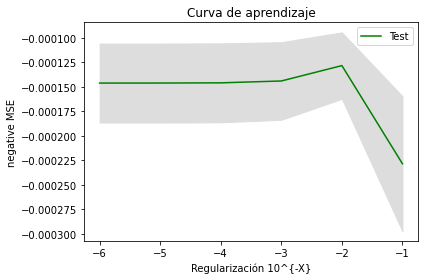

In [100]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.01
######################################################

In [101]:
#una capa oculta con 250 neuronas, función de activación ReLU, regularización L2,
#tamaño de mini-batch 100, tasa de aprendizaje 0.05, y máximo de 500 iteraciones a los datos (epochs).

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.05, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, variables_entrada_scaled, variable_objetivo_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.0006549413667619055,
  -9.127809017437596e-05,
  -0.00014527500062218388,
  -0.0001621750234742549,
  -0.00016202065420338067,
  -0.00016209284256964016],
 [0.0005605556860065468,
  3.3483086313056655e-05,
  6.128674405991823e-05,
  6.812074327907146e-05,
  6.926751715801186e-05,
  6.96793850866245e-05])

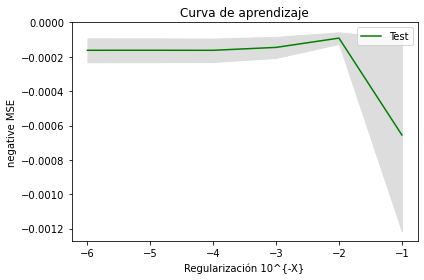

In [102]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.05
######################################################

Podemos obsevar un comportamiento bastante estable para este parámetro. Parece que el mejor valor (el más cercano a cero) es con $\alpha=10^{-2}$ en ambos estudios, variando el learning_rate.

**Segundo MLP**

In [103]:
#dos capas ocultas de 125, función de activación ReLU, regularización L2,
#tamaño de mini-batch 100, tasa de aprendizaje 0.01, y máximo de 500 iteraciones a los datos (epochs).

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(125,125, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.01, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, variables_entrada_scaled, variable_objetivo_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.001027177475024369,
  -0.0002619155073440854,
  -0.00027822873100778094,
  -0.00026863069252111663,
  -0.0002810174633786145,
  -0.00029007260444584054],
 [0.0008717800957896246,
  0.00012990681813303194,
  4.432720712797227e-05,
  4.25703666169958e-05,
  5.035845977351495e-05,
  4.879213617196593e-05])

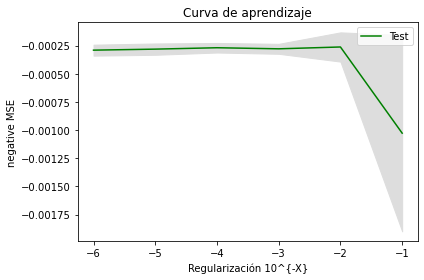

In [104]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.05
######################################################

In [105]:
#dos capas ocultas de 125, función de activación ReLU, regularización L2,
#tamaño de mini-batch 100, tasa de aprendizaje 0.05, y máximo de 500 iteraciones a los datos (epochs).

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(125,125, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.05, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, variables_entrada_scaled, variable_objetivo_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.0018609615788383437,
  -0.00016411549824546103,
  -0.00042597232034675937,
  -0.0011594355139799165,
  -0.0005977622184457234,
  -0.0012310813153381978],
 [0.0015903386788184016,
  7.144004073347689e-05,
  0.0002373448463273984,
  0.0007886737798277405,
  0.00046482581167488733,
  0.0016096574172691294])

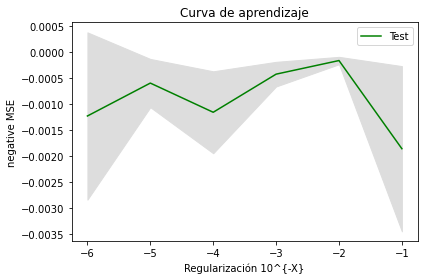

In [106]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.05
######################################################

En este segundo modelo, obtenemos una tasa de fallos mejor y constante con un learning_rate de 0.01, pero este es mucho mejor que el del primer mlp.

Analizaremos el error obtenido utilizando el primer perceptrón con una learning_rate de 0.01, para el cual hemos obtenido una tasa de fallos menor que el resto.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 

In [107]:
from sklearn.model_selection import cross_val_predict

In [133]:
# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.01, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, variables_entrada_scaled, variable_objetivo_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)

In [135]:
errors = np.abs(variable_obj - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_quality = np.mean(variable_obj)

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_quality)

Error medio: 0.006643347745988796
Desviación típica: 0.009304012052892595
Error medio en %: 0.0011787298097909549


Nuestro modelo comete un error medio de 0.023 con una desviación típica muy baja.

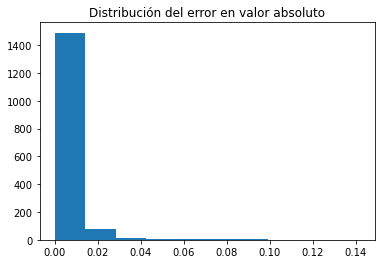

In [136]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

Aunque la mayor parte de los errores se concentran en la parte izquierda de la gráfica, el error asociado a estos es mínimo con respecto a la clasificación en tipos de calidad que estamos buscando.

Dibujamos la distancia entre el valor predicho por el modelo y el valor real en una gráfica. La diagonal representa error 0.

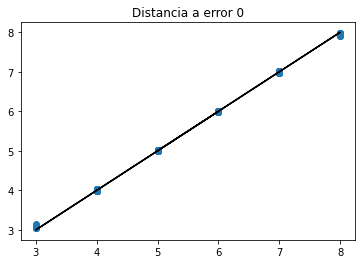

In [137]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(variable_obj, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(variable_obj, variable_obj, color='k') 

plt.title('Distancia a error 0')
plt.show()

Como podemos ver, al ser 'quality' una variable cuyos datos son muy específicos en el rango expuesto, apenas es relevante el error producido, dado que si redondeamos los decimales, tendremos la clase objetivo buscada y en muy pocos casos, se equivocará asignando la anterior o siguiente calidad.

Podemos ver como el predictor reconoce mejor los vinos asociados a la clases de calidad más baja que a los de calidades más altas, que como hemos visto en los apartados anteriores, tiene coherencia porque los vinos de mayor calidad no estaban correlacionados fuertemente con la variable objetivo y dependian de la combinación de otras variables que hemos obviado por no tener apenas relación con la variable objetivo.